### Importing Necessary Libraries

In [19]:
from sklearn.svm import SVC
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

Loading necessary data for training

The MNIST dataset consist 42000 hand written digit examples from 0 to 9. Each digit is made up of 28 X 28 pixels varrying from 0 to 255.  


In [16]:
train_data = pd.read_csv("Data\\MNIST\\train.csv")
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualising the data

Text(0.5, 1.0, 'Digit 1')

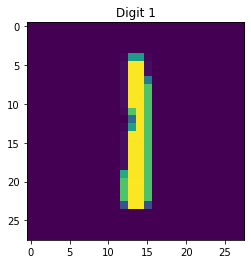

In [11]:
one = train_data.iloc[2, 1:]
one = one.values.reshape(28,28)
plt.imshow(one)
plt.title("Digit 1")

In [18]:
train_data.shape 

(42000, 785)

Visualising the data on the basis of number of digit present in the dataset

c:\Users\adity\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

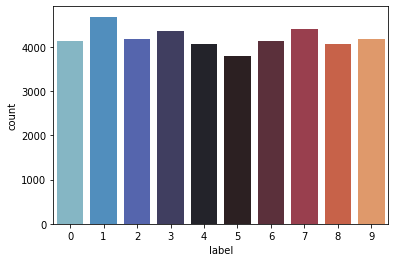

In [21]:
sns.countplot(train_data['label'],palette = 'icefire')

Here we are scalling our dataset by dividing it by 255. to make it between 0-1 as 255 is the maximum pixel value and also to convert the pixels into floating point number

In [22]:
x = train_data.drop("label" , axis = 1)
y = train_data["label"]
x = x/255.                              

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)
print("Length of training set is",x_train.shape[0])
print("Length of test set is",x_test.shape[0])

Length of training set is 33600
Length of test set is 8400


## Model Building 

1. Let's first try with linear kernel

In [34]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

model_linear.score(x_test , y_test)

0.9285714285714286

With linear kernel we are getting an accuracy of 92.85%

2. Now let's try with non-linear kernels

1. with rbf kernel

In [35]:
model_rbf = SVC(kernel="rbf")
model_rbf.fit(x_train , y_train)

model_rbf.score(x_test, y_test)

0.9755952380952381

2. with poly kernal 

In [36]:
model_poly = SVC(kernel="poly")
model_poly.fit(x_train , y_train)

model_poly.score(x_test , y_test)

0.9701190476190477

##### From the above result we can conclude that the model is giving high accuracy (i.e 97.55%) when kernel is set to rbf however this can vary from system to system